**Artificial Inteligence (CS550)**
<br>
Date: **30 March 2021**
<br>


Title: **Seminar 16 - Part B**

Speaker: **Dr. Shota Tsiskaridze**


Bibliography: 
<br>
[1] **Chapter 1**, Jeremy Howard & Sylvain Gugger, Deep Learning for Coders with fastai & PyTorch, O'Reilly Media, Inc., 2020

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [1]:
#hide
from fastbook import *

## Deep Learning Is Not Just for Image Classification

Deep learning's effectiveness for classifying images has been widely discussed in recent years, even showing _superhuman_ results on complex tasks like recognizing malignant tumors in CT scans. But it can do a lot more than this, as we will show here.

For instance, let's talk about something that is critically important for autonomous vehicles: localizing objects in a picture. If a self-driving car doesn't know where a pedestrian is, then it doesn't know how to avoid one! Creating a model that can recognize the content of every individual pixel in an image is called *segmentation*. Here is how we can train a segmentation model with fastai, using a subset of the [*Camvid* dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf) from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database" by Gabruel J. Brostow, Julien Fauqueur, and Roberto Cipolla:

In [3]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.342220,2.524055,00:01


epoch,train_loss,valid_loss,time
0,2.008335,1.765126,00:02
1,1.699599,1.258741,00:02
2,1.501724,1.185567,00:02
3,1.342819,0.908458,00:02
4,1.194041,0.757789,00:02
5,1.071781,0.735400,00:02
6,0.974898,0.708995,00:02
7,0.900512,0.703599,00:02


We are not even going to walk through this code line by line, because it is nearly identical to our previous example! (Although we will be doing a deep dive into segmentation models in <<chapter_arch_details>>, along with all of the other models that we are briefly introducing in this chapter, and many, many more.)

We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image. As you can see, it nearly perfectly classifies every pixel in every object. For instance, notice that all of the cars are overlaid with the same color and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label and the right is the prediction from the model):

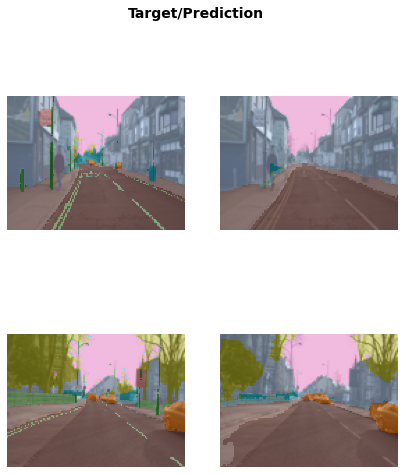

In [4]:
learn.show_results(max_n=6, figsize=(7,8))